<a href="https://colab.research.google.com/github/AlexMa123/DCNN-SHHS/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic sleep-stage classification of heart rate and actigraphy data using deep and transfer learning approaches

This notebook serves as a guide to train the neural network that has been presented in the research article titled **"Automatic sleep-stage classification of heart rate and actigraphy data using deep and transfer learning approaches"** using the SHHS dataset.

In [1]:
# import packages
import h5py
import matplotlib.pyplot as plt
import numpy as np

## SHHS Dataset

The [Sleep Heart Health Study (SHHS)](https://sleepdata.org/datasets/shhs) is a multi-center cohort study implemented by the National Heart Lung & Blood Institute to determine the cardiovascular and other consequences of sleep-disordered breathing. 

### Download Dataset

In [2]:
!wget "https://onedrive.live.com/download?cid=45D5A10F94E33861&resid=45D5A10F94E33861%21248707&authkey=AKRa5kb3XFj4G-o" -O shhs_dataset.h5

--2023-05-08 11:21:40--  https://onedrive.live.com/download?cid=45D5A10F94E33861&resid=45D5A10F94E33861%21248707&authkey=AKRa5kb3XFj4G-o
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://m10oca.db.files.1drv.com/y4mlYth4UE-VHsegWfLxC39i_OWmK2RKdRu2vcK-bOdAwXGmJigHPzJI-abL43O0ixLA88vFVH3L9P2ahKxaEPEAR7n1_9fGj2xmfD0q5N9GtmH0-Oed7ISdEmk1iswYiU3M7BjMonB9EMW91glOgFkXoQQDiIEPWTF70S1J-NsqWa3SKfYql-Y96HyPaFTz4SGwlY5iqf-BToPDuLv53Y4AQ/SHHS_dataset.h5?download&psid=1 [following]
--2023-05-08 11:21:41--  https://m10oca.db.files.1drv.com/y4mlYth4UE-VHsegWfLxC39i_OWmK2RKdRu2vcK-bOdAwXGmJigHPzJI-abL43O0ixLA88vFVH3L9P2ahKxaEPEAR7n1_9fGj2xmfD0q5N9GtmH0-Oed7ISdEmk1iswYiU3M7BjMonB9EMW91glOgFkXoQQDiIEPWTF70S1J-NsqWa3SKfYql-Y96HyPaFTz4SGwlY5iqf-BToPDuLv53Y4AQ/SHHS_dataset.h5?download&psid=1
Resolving m10oca.db.files.1drv.com (m10oca.db.files.

## Data structure

The dataset created by us only save the 4 Hz and sleep stages.

![RR interval](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Heart_rate_variability_%28HRV%29.svg/1280px-Heart_rate_variability_%28HRV%29.svg.png)

The sleep stages is saved as interger numbers:

|number|stage|
|------|-----|
|  0   | Wake|
|  1   | N1  |
|  2   | N2  |
|  3   | N3  |
|  5   | REM |



In [4]:
shhs_dataset = h5py.File("./shhs_dataset.h5", 'r')

# where the rris are saved
shhs_dataset['rri']
# where the sleep stages are saved
shhs_dataset['slp']

# The patients' id
patients = list(shhs_dataset['rri'].keys())
print(patients[:10])

['200001_1', '200002_1', '200003_1', '200004_1', '200005_1', '200006_1', '200007_1', '200008_1', '200009_1', '200010_1']


To load the patient 200080's rri and sleep stage, one should use 

In [5]:
freq_rri = shhs_dataset['rri'].attrs['freq']
print(f"The frequency of RR interval is {freq_rri}")

The frequency of RR interval is 4


In [6]:
# 200080_1 means the first night recording from patient 200001
rri_tmp = shhs_dataset['rri']['200080_1'][:] # rri_tmp is an array of data
slp_tmp = shhs_dataset['slp']['200080_1'][:]

Text(0, 0.5, 'RRI/s')

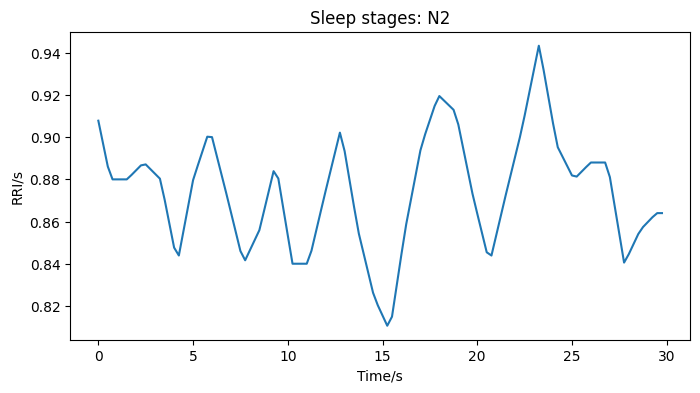

In [9]:
num2stage = {
    0: 'wake',
    1: 'N1',
    2: 'N2',
    3: 'N3',
    5: 'REM'
}

# plot the ith epoch
i = 13
plt.figure(figsize=(8, 4))
plt.plot(np.arange(0, 30, 1 / 4), rri_tmp[i * 30 * 4: (i + 1) * 30 * 4])
plt.title(f"Sleep stages: {num2stage[slp_tmp[i]]}")
plt.xlabel("Time/s")
plt.ylabel("RRI/s")